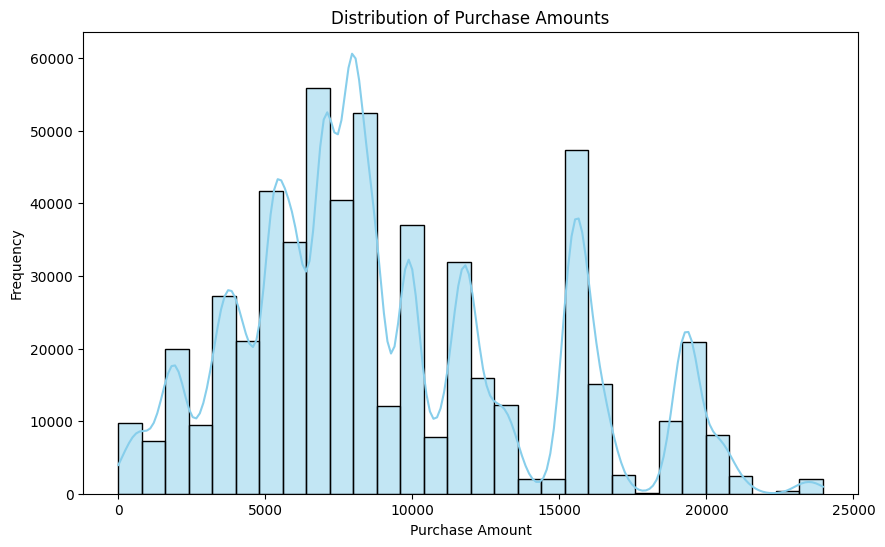

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')
df2 = df1.copy()

# Distribution of Purchase Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


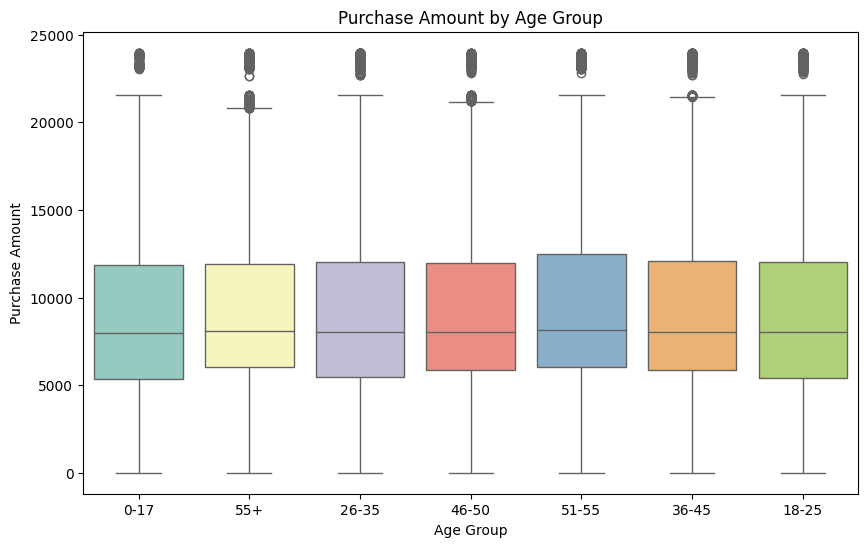

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=df, palette='Set3')
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()


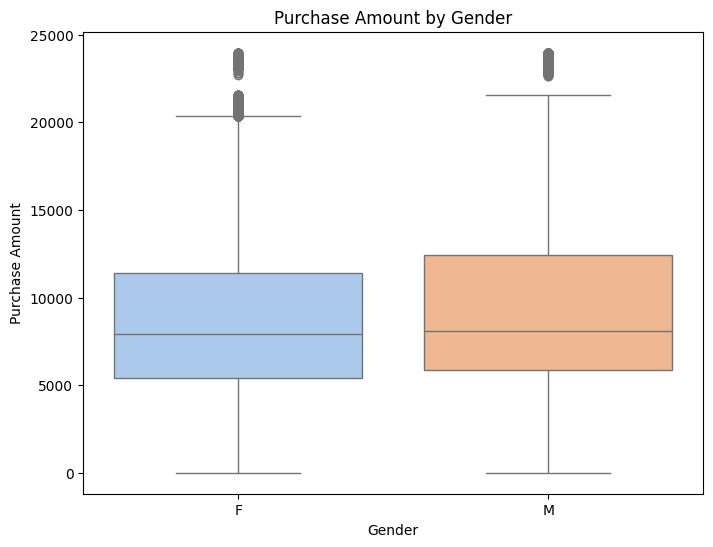

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase', data=df, palette='pastel')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()


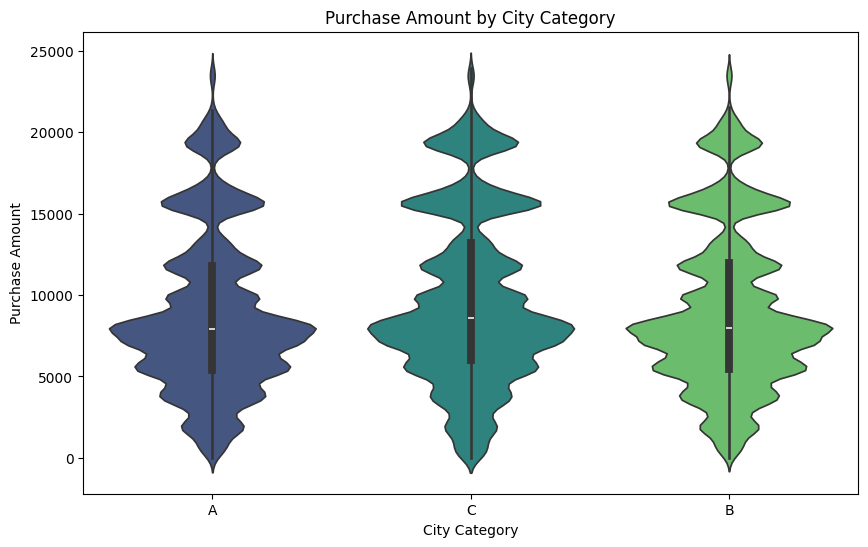

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='City_Category', y='Purchase', data=df, palette='viridis')
plt.title('Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()


In [52]:
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


# Fill missing values (e.g., assuming NaNs mean no category, so use 0)
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)
df1['Product_Category_2'].fillna(0, inplace=True)
df1['Product_Category_3'].fillna(0, inplace=True)

In [53]:
# Label encoding for categorical features
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df1['Age'] = le.fit_transform(df1['Age'])
df1['Gender'] = le.fit_transform(df1['Gender'])

# Encoding Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'] = le.fit_transform(df['Stay_In_Current_City_Years'])
df1['Stay_In_Current_City_Years'] = le.fit_transform(df1['Stay_In_Current_City_Years'])

In [54]:
# Process Product_ID by removing 'P00' prefix
df['Product_ID'] = df['Product_ID'].str.replace('P00', '').astype(int)
df1['Product_ID'] = df1['Product_ID'].str.replace('P00', '').astype(int)

# Encoding City_Category
df['City_Category'] = le.fit_transform(df['City_Category'])
df1['City_Category'] = le.fit_transform(df1['City_Category'])

In [55]:
# Feature engineering
df['Age_Gender'] = df['Age'] * df['Gender']
df1['Age_Gender'] = df1['Age'] * df1['Gender']

df['Product_Category_1_2'] = df['Product_Category_1'] * df['Product_Category_2']
df1['Product_Category_1_2'] = df1['Product_Category_1'] * df1['Product_Category_2']

df['Product_Category_2_3'] = df['Product_Category_2'] * df['Product_Category_3']
df1['Product_Category_2_3'] = df1['Product_Category_2'] * df1['Product_Category_3']

# Convert 'Purchase' to numeric
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

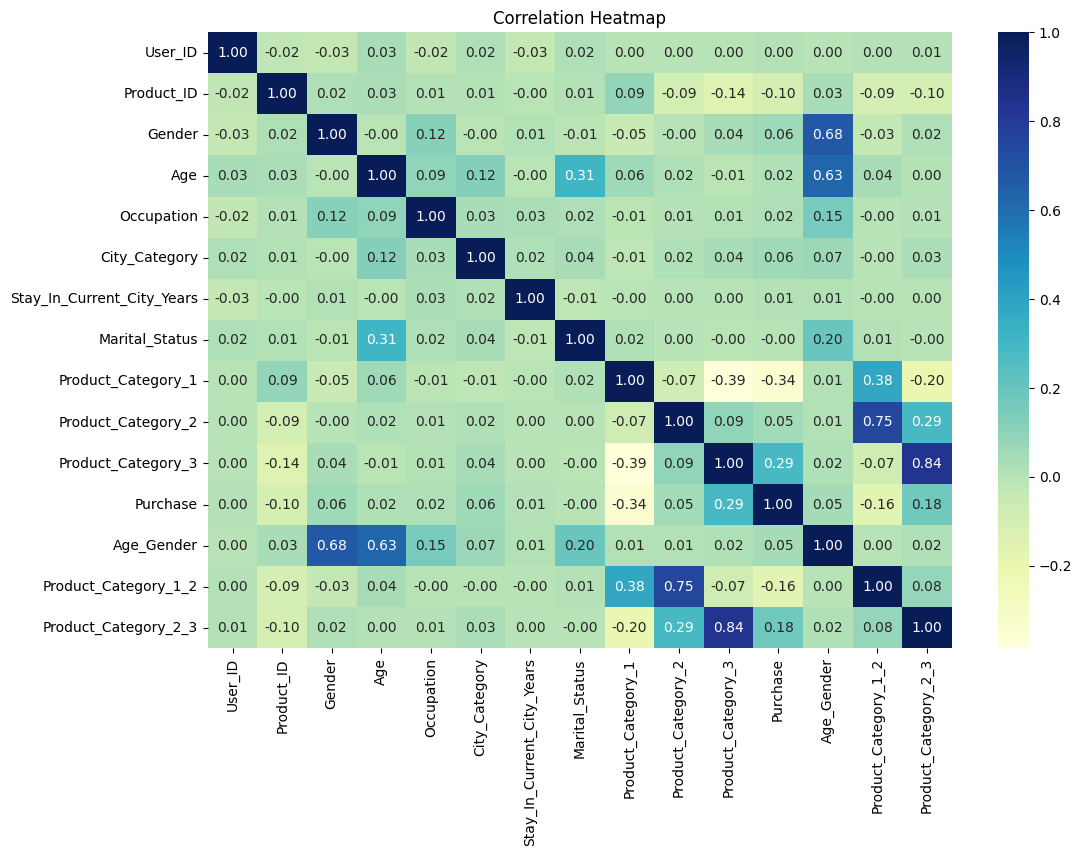

In [56]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 550068, number of used features: 14
[LightGBM] [Info] Start training from score 9263.968713


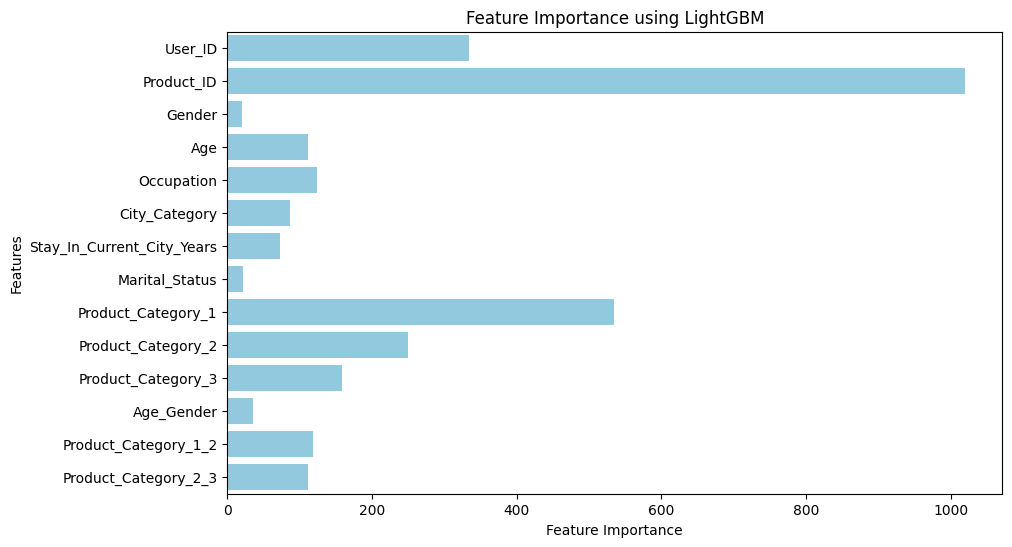

In [57]:
# Train LightGBM model
X = df.drop(['Purchase'], axis=1)
y = df['Purchase']
model = LGBMRegressor()
model.fit(X, y)

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns, color='skyblue')
plt.title('Feature Importance using LightGBM')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


In [58]:
# Define features and target
features = list(df.columns)
features.remove('Purchase')
target = 'Purchase'

train_x = df[features]
train_y = df[target]
test_x = df1[features]

In [46]:
# Initialize LightGBM Regressor
lgbm_model = LGBMRegressor(
    objective='regression',
    learning_rate=0.05,
    n_estimators=1000,
    max_depth=8,
    num_leaves=32,
    random_state=42
)

# Train the model
lgbm_model.fit(train_x, train_y)

# Evaluate using cross-validation
cv_scores = cross_val_score(lgbm_model, train_x, train_y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation RMSE: {np.sqrt(-cv_scores.mean())}")

# Predict on test data
y_pred = lgbm_model.predict(test_x)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 742
[LightGBM] [Info] Number of data points in the train set: 550068, number of used features: 14
[LightGBM] [Info] Start training from score 9263.968713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 742
[LightGBM] [Info] Number of data points in the train set: 440054, number of used features: 14
[LightGBM] [Info] Start training from score 9253.402592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

In [47]:
# Save predictions to CSV
output = pd.DataFrame({
    'Product_ID': df2['Product_ID'],
    'User_ID': df2['User_ID'],
    'Purchase': y_pred
})
output.to_csv('predictions_lgbm.csv', index=False)

print("Predictions saved to 'predictions_lgbm.csv'")


Predictions saved to 'predictions_lgbm.csv'
